# PCA with numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pandas import Series, DataFrame
from numpy import linalg as LA

In [3]:
from sympy import init_printing, Matrix, symbols, Rational
import sympy as sym
from warnings import filterwarnings
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

In [4]:
# !cat 'Datasets/Wine.csv'



















































































































































































14.13,4.1,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.6,560,3

In [5]:
dataset = pd.read_csv("Datasets/Wine.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
dataset.shape

(178, 14)

Labels are stored in the `Customer_Segment` column. We print the distinct labels.

In [7]:
np.unique(dataset['Customer_Segment'])

array([1, 2, 3])

Next, we separate datapoints from labels.

In [8]:
Xh = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
X = Xh.T

Print dimensions and rank.

In [9]:
X.shape, LA.matrix_rank(X)

((13, 178), 13)

We now compute the singular value decomposition (SVD): $$X = U\Sigma V^{\top} = \sum_{i=1}^d \lambda_i u_i v_i^{\top}$$

SVD is the generalization to non-square matrices of the spectral decomposition.
* $U$ and $V$ are orthogonal matrices
* The columns of $U$ are the eigenvectors of $XX^{\top}$
* The columns of $V$ are the eigenvectors of $X^{\top}X$
* The singular values (diagonal elements of $\Sigma$) are the eigenvalues of $\sqrt{XX^{\top}}$ or, equivalently, of $\sqrt{X^{\top}X}$

In [10]:
U, s, Vh = LA.svd(X, full_matrices=False)
U.shape, s.shape, Vh.shape

((13, 13), (13,), (13, 178))

In [11]:
Matrix(np.diag(np.round(s, decimals=2)))

⎡10886.67   0.0     0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.
⎢                                                                             
⎢  0.0     493.56   0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.
⎢                                                                             
⎢  0.0      0.0    57.15  0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.
⎢                                                                             
⎢  0.0      0.0     0.0   30.1   0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.
⎢                                                                             
⎢  0.0      0.0     0.0   0.0   18.54   0.0    0.0   0.0   0.0   0.0   0.0  0.
⎢                                                                             
⎢  0.0      0.0     0.0   0.0    0.0   14.46   0.0   0.0   0.0   0.0   0.0  0.
⎢                                                                             
⎢  0.0      0.0     0.0   0.0    0.0    0.0   11.04 

Let's check that, indeed, $XX^{\top}u_1 = \sigma_1^2 u_1$

In [12]:
Matrix(X @ X.T @ U[:,1]), Matrix(s[1]*s[1]*U[:,1])

⎛⎡-27816.7100915685⎤  ⎡-27816.7100915681⎤⎞
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-6850.03771565501⎥  ⎢-6850.03771565498⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-5401.68792800406⎥  ⎢-5401.68792800404⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-55604.8451271534⎥  ⎢-55604.8451271534⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-233331.85489306 ⎥  ⎢-233331.85489306 ⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-3670.36911309988⎥  ⎢-3670.36911309989⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-1967.47043018301⎥, ⎢ -1967.470430183 ⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-1040.79495147286⎥  ⎢-1040.79495147286⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-2828.17679724122⎥  ⎢-2828.17679724121⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-8301.0722283882 ⎥  ⎢-8301.07222838818⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-1928.2299257478 ⎥  ⎢-1928.22992574779⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢-4795.63478642165⎥  ⎢-4795.63478642167⎥⎟
⎜⎢         

We now take the two *principal eigenvectors*. Namely, the ones associated with the largest singular values.

In [13]:
P = U[:,:2]
Matrix(P)

⎡ -0.0149627682837696    -0.114188468874407 ⎤
⎢                                           ⎥
⎢-0.00254474350954567   -0.0281196200380176 ⎥
⎢                                           ⎥
⎢-0.00270802832101919   -0.0221740986552942 ⎥
⎢                                           ⎥
⎢ -0.0213830884770834    -0.22825963624623  ⎥
⎢                                           ⎥
⎢ -0.115577596137427     -0.957834595182419 ⎥
⎢                                           ⎥
⎢-0.00274422126643401   -0.0150669805253438 ⎥
⎢                                           ⎥
⎢-0.00252832530323414   -0.00807652793010805⎥
⎢                                           ⎥
⎢-0.000391490065228769  -0.00427249597560871⎥
⎢                                           ⎥
⎢-0.00188971728448863   -0.0116097546086512 ⎥
⎢                                           ⎥
⎢-0.00606975015734123   -0.0340761623015525 ⎥
⎢                                           ⎥
⎢ -0.0011091744143142   -0.00791544442653894⎥
⎢                                 

Note that the linear operator $T_{P^{\top}} : \mathbb{R}^{13} \to \mathbb{R}^2$ corresponding to $P^{\top}$ projects the original data onto the subspace spanned by the two principal eigenvectors.

We thus project the columns of $X$ onto this space. 

In [14]:
R = P.T @ X
Matrix(R)

⎡-1072.75836092227   -1054.62160942514  -1188.95306545502  -1483.24410756816  
⎢                                                                             
⎣-0.967324840776547   24.310812098003   37.5913121482582   61.2935579542429   

-744.147209616465  -1453.29347922461  -1292.55678813332  -1300.46886842121  -1
                                                                              
-32.5753079639107  59.1413090616355   55.6541866949856   31.6564434054102   25

049.39991412934  -1049.55825316575  -1512.11317674985  -1282.54819249298  -132
                                                                              
.7395542706237   24.3575636455102   72.3554692372043   55.0007322512372   65.6

1.55585829196  -1152.91191709079  -1548.39263788693  -1314.32064737492  -1285.
                                                                              
751794461105    44.511301808073   80.8913531731564   42.1303033060927   30.226

52183190641  -1136.00125226153  -1681.2422776000

We now plot the data points in this space (using color-coding for the labels).

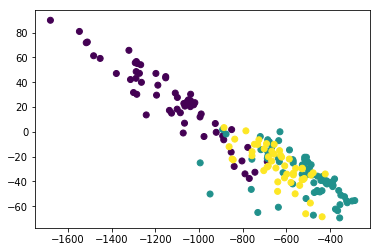

In [15]:
%matplotlib inline
plt.scatter(R[0,:], R[1,:], c=y)

The principal eigenvectors correspond to orthogonal directions along which the data are spread the most.

In contrast, here is a projection that uses two eigenvectors associated to small singular values (note the change of scale in the axis).

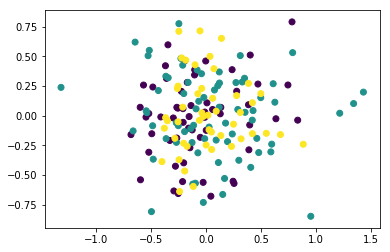

In [16]:
P = U[:,7:9]
R = P.T @ X
plt.scatter(R[0,:], R[1,:], c=y)

Intuitively, principal components help reduce the number of dimension without losing too much information in the data. This is formally stated as follows.

**Theorem (Eckhart-Young).** Let $X$ be a $d \times m$ matrix with SVD $U\Sigma V^{\top}$, where $\Sigma = \mathrm{diag}\big(\sigma_1,\dots,\sigma_r\big)$. Pick $1 \le k \le r$ and let
$
	X_k = U \Sigma_k V^{\top}
$
be the matrix such that $\Sigma_k = \mathrm{diag}\big(\sigma_1,\dots,\sigma_k,0\dots,0\big)$. Then
$$
	X_k = \underset{Z \,:\, \mathrm{rank}(Z) \le k}{\mathrm{argmin}} \|X - Z\|_F^2~.
$$

$\|\cdot\|_F$ is the Frobenius norm of a matrix, defined as
$$
\|X\|_F = \sqrt{\sum_{i,j}X_{i,j}^2}
$$
We now apply principal component analysis to a second dataset.

In [17]:
dataset = pd.read_csv("Datasets/Iris.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [18]:
dataset.shape

(150, 6)

Labels are stored in the column `Species`. However, unlike the previous example, they are encoded using strings.

In [19]:
np.unique(dataset['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We then map these strings to integers. First, we create a dictionary, and then we invoke the method `map()` on the column `Species`

In [20]:
label_to_int = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3}
dataset['Species'] = dataset['Species'].map(label_to_int)
np.unique(dataset['Species'])

array([1, 2, 3])

In [21]:
Xh = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values
X = Xh.T

In [22]:
X.shape, LA.matrix_rank(X)

((4, 150), 4)

In [23]:
U, s, Vh = LA.svd(X, full_matrices=False)
U.shape, s.shape, Vh.shape

((4, 4), (4,), (4, 150))

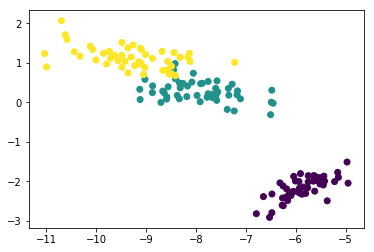

In [24]:
P = U[:,:2]
R = P.T @ X
plt.scatter(R[0,:], R[1,:], c=y)

Similarly to before, projecting onto components associated to small singular values causes the data to lump together.

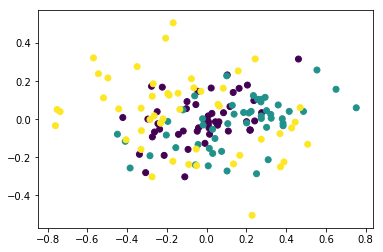

In [25]:
P = U[:,2:4]
R = P.T @ X
plt.scatter(R[0,:], R[1,:], c=y)